In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:/Users/user/Downloads/bank-full.csv")
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

In [3]:
df.shape #Finding Shape

(45211, 17)

In [4]:
df.dtypes #Finding Datatype

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [5]:
#c. Report statistical summary of the dataset. (3 marks)

df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [6]:
#b. Check info of the dataset (1 marks)

df.info() #checking info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
# d. Check the presence of missing values and impute if there is any (3 marks)

df.isnull().sum()

#No missing values present

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [8]:

!pip install pandas_profiling
import pandas_profiling
df.profile_report()


Summarize dataset:   0%|          | 0/30 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

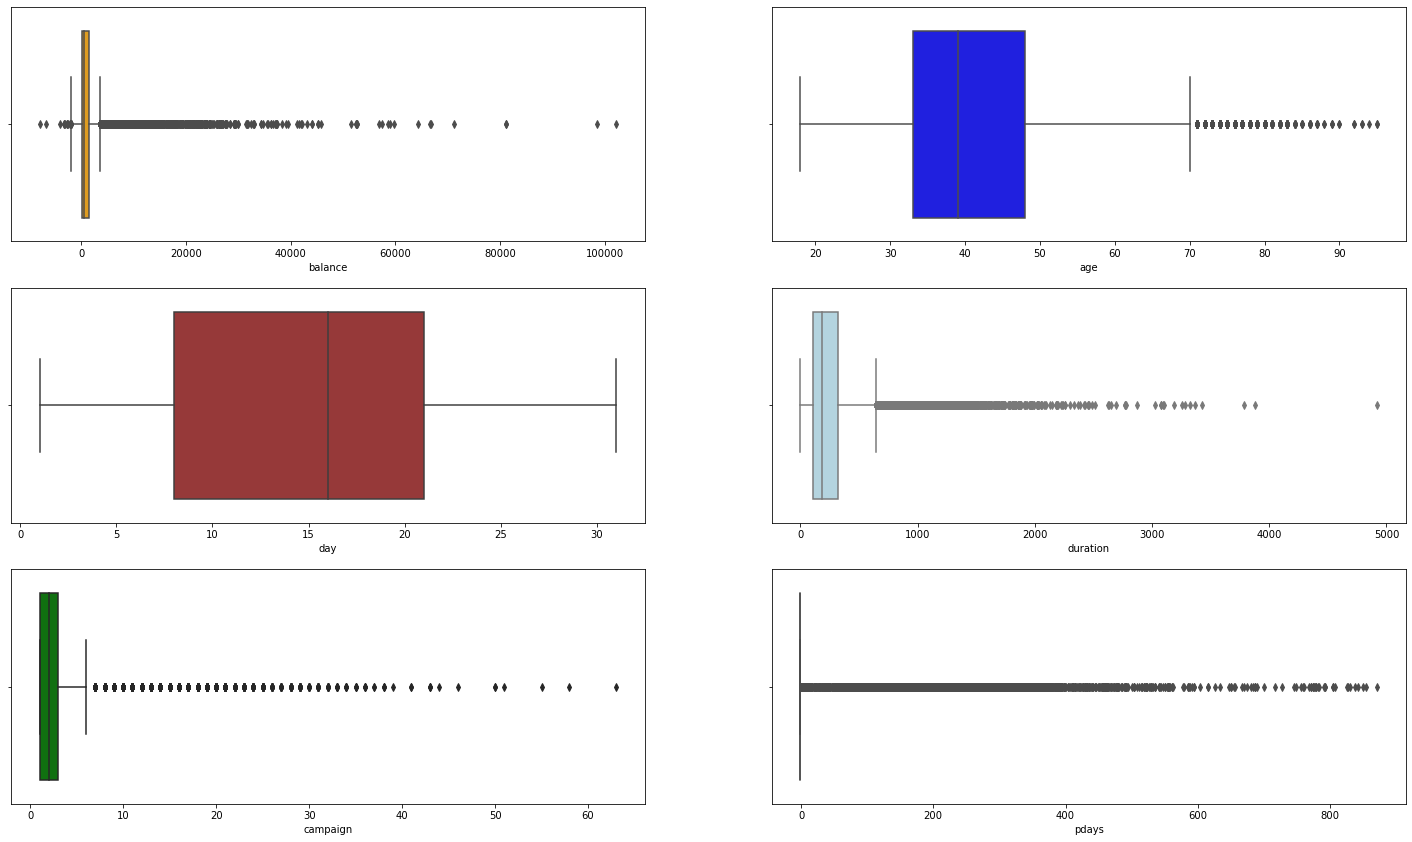

In [9]:
# e. Checking the presence of outliers and impute if there is any (3 marks)

plt.figure(figsize= (25,25))
plt.subplot(5,2,1)
sns.boxplot(x= df.balance, color='orange')

plt.subplot(5,2,2)
sns.boxplot(x= df.age, color='blue')

plt.subplot(5,2,3)
sns.boxplot(x= df.day, color='brown')

plt.subplot(5,2,4)
sns.boxplot(x= df.duration, color='lightblue')

plt.subplot(5,2,5)
sns.boxplot(x= df.campaign, color='green')

plt.subplot(5,2,6)
sns.boxplot(x= df.pdays, color='yellow')

In [10]:
## Binning the variables to overcome the skweness, to deal with outliers

#Binning Balance
def bal_group(series):
    if series < 0:
        return "negative balance"
    elif 0 <= series < 500:
        return "low balance"
    elif 500 <= series < 2000:
        return "moderate balance"
    elif 2000 <= series < 10000:
        return "high balance"
    elif 10000 <= series:
        return "very high balance"

df['bal_group'] = df['balance'].apply(bal_group)

In [11]:
df['bal_group'].value_counts()
pd.crosstab(df['bal_group'],df['Target'])

Target                no   yes
bal_group                     
high balance        6403  1274
low balance        17899  1972
moderate balance   11370  1698
negative balance    3556   210
very high balance    694   135

In [12]:
def camp_group(series):
    if series <= 1:
        return "1st Contact"
    elif 2 <= series <= 5:
        return "2-5 Contacts"
    elif 6 <= series <= 10:
        return "6-10 Contacts"
    elif 10 < series:
        return "More than 10 Contacts"

df['camp_group'] = df['campaign'].apply(camp_group)

In [13]:
#Most of people subscribe with lower number of contacts
df['camp_group'].value_counts()
pd.crosstab(df['camp_group'],df['Target'])

Target                    no   yes
camp_group                        
1st Contact            14983  2561
2-5 Contacts           20837  2475
6-10 Contacts           2953   206
More than 10 Contacts   1149    47

In [14]:
def dura_group(series):
    if series <= 120:
        return "<2 mints Duration"
    elif 120 < series <= 600:
        return "<2-10 mints Duration"
    elif 600 < series <= 1800:
        return "<10-30 mints Contacts"
    elif 1800 < series:
        return "More than 30 mints Contacts"

df['dura_group'] = df['duration'].apply(dura_group)

In [15]:
df['dura_group'].value_counts()
pd.crosstab(df['dura_group'],df['Target'])

Target                          no   yes
dura_group                              
<10-30 mints Contacts         1905  1778
<2 mints Duration            13833   211
<2-10 mints Duration         24132  3245
More than 30 mints Contacts     52    55

In [16]:
df_1=df.copy()
df.drop(['balance','campaign'],axis=1,inplace=True)

In [17]:
# h. Perform bivariate analysis using pairplot and mention your findings. (3 marks)

df.groupby(['Target']).agg(['mean','median'])

age               day           duration             pdays  \
             mean median       mean median        mean median       mean   
Target                                                                     
no      40.838986     39  15.892290     16  221.182806    164  36.421372   
yes     41.670070     38  15.158253     15  537.294574    426  68.702968   

               previous         
       median      mean median  
Target                          
no         -1  0.502154      0  
yes        -1  1.170354      0

Target                no        yes
job                                
student        71.321962  28.678038
retired        77.208481  22.791519
unemployed     84.497314  15.502686
management     86.244449  13.755551
admin.         87.797331  12.202669
self-employed  88.157061  11.842939
unknown        88.194444  11.805556
technician     88.943004  11.056996
services       91.116996   8.883004
housemaid      91.209677   8.790323
entrepreneur   91.728312   8.271688
blue-collar    92.725031   7.274969


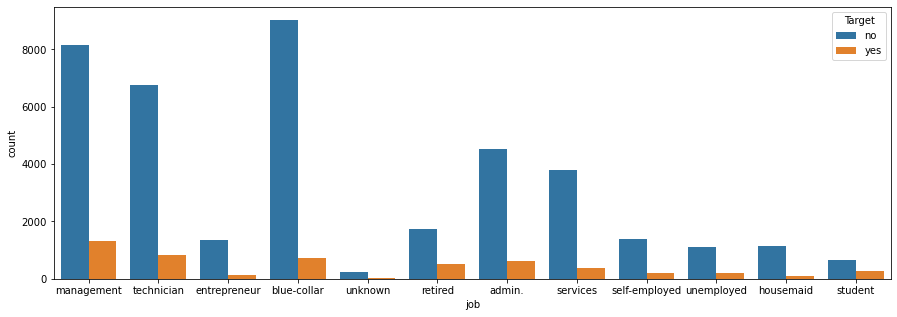

In [18]:
#job - blue collar jobs was the most contacted in marketing campaign however they are the least who subscribed it.
#Student have mostly subscribed term deposit, however they are least contacted in marketing campaign
print(pd.crosstab(df['job'],df['Target'],normalize='index').mul(100).sort_values(by='yes',ascending=False))
plt.figure(figsize=(15,5))
sns.countplot(x='job',hue='Target',data=df)

Target           no        yes
marital                       
single    85.050821  14.949179
divorced  88.054542  11.945458
married   89.876534  10.123466


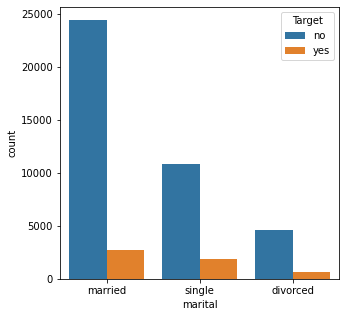

In [19]:
#Married was the most conatcted group however they are the least who subscribed it.
#Single are the most who subscribed for term deposit
print(pd.crosstab(df['marital'],df['Target'],normalize='index').mul(100).sort_values(by='yes',ascending=False))
plt.figure(figsize=(5,5))
sns.countplot(x='marital',hue='Target',data=df)

Target            no        yes
education                      
tertiary   84.993610  15.006390
unknown    86.429725  13.570275
secondary  89.440565  10.559435
primary    91.373522   8.626478


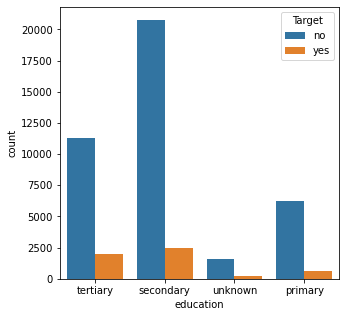

In [20]:
#tertiary education mostly subscribed to term deposit
print(pd.crosstab(df['education'],df['Target'],normalize='index').mul(100).sort_values(by='yes',ascending=False))
plt.figure(figsize=(5,5))
sns.countplot(x='education',hue='Target',data=df)

Target          no        yes
default                      
no       88.203892  11.796108
yes      93.619632   6.380368


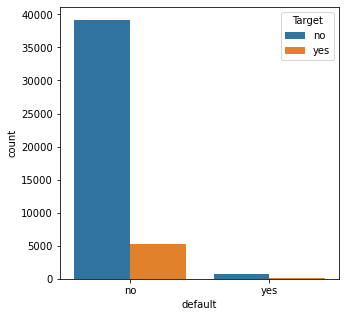

In [21]:
#defaulter/non defaultor- those who subscribed to term deposit is very low. dont believe will add much to our analysis
print(pd.crosstab(df['default'],df['Target'],normalize='index').mul(100).sort_values(by='yes',ascending=False))
plt.figure(figsize=(5,5))
sns.countplot(x='default',hue='Target',data=df)

Target          no        yes
housing                      
no       83.297645  16.702355
yes      92.300040   7.699960


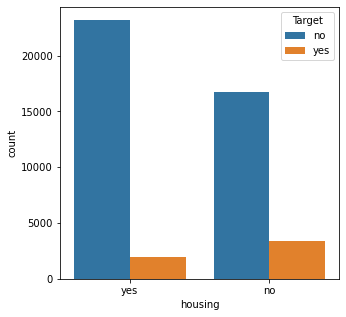

In [22]:
print(pd.crosstab(df['housing'],df['Target'],normalize='index').mul(100).sort_values(by='yes',ascending=False))
plt.figure(figsize=(5,5))
sns.countplot(x='housing',hue='Target',data=df)

Target         no        yes
loan                        
no      87.344273  12.655727
yes     93.318609   6.681391


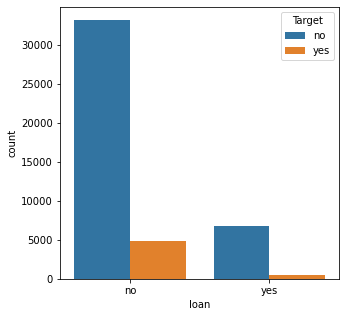

In [23]:
print(pd.crosstab(df['loan'],df['Target'],normalize='index').mul(100).sort_values(by='yes',ascending=False))
plt.figure(figsize=(5,5))
sns.countplot(x='loan',hue='Target',data=df)

Target            no        yes
contact                        
cellular   85.081100  14.918900
telephone  86.579491  13.420509
unknown    95.929339   4.070661


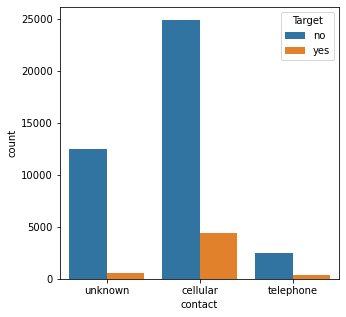

In [24]:
print(pd.crosstab(df['contact'],df['Target'],normalize='index').mul(100).sort_values(by='yes',ascending=False))
plt.figure(figsize=(5,5))
sns.countplot(x='contact',hue='Target',data=df)

Target         no        yes
day                         
1       72.049689  27.950311
10      76.908397  23.091603
30      82.694764  17.305236
22      82.983425  17.016575
3       83.503244  16.496756
4       84.083045  15.916955
25      84.166667  15.833333
12      84.778540  15.221460
13      84.794953  15.205047
2       85.924207  14.075793
15      86.024662  13.975338
24      86.129754  13.870246
16      86.431095  13.568905
23      86.581470  13.418530
27      86.619090  13.380910
11      87.762001  12.237999
9       88.532992  11.467008
14      88.636364  11.363636
5       88.743455  11.256545
26      88.792271  11.207729
8       89.087948  10.912052
21      90.078973   9.921027
18      90.121317   9.878683
6       90.631470   9.368530
17      90.923156   9.076844
7       91.359384   8.640616
28      92.185792   7.814208
29      92.607450   7.392550
31      92.846034   7.153966
20      93.023256   6.976744
19      93.056346   6.943654


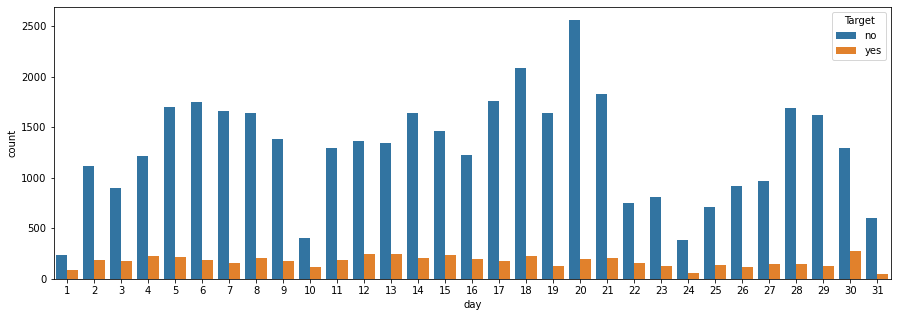

In [25]:
print(pd.crosstab(df['day'],df['Target'],normalize='index').mul(100).sort_values(by='yes',ascending=False))
plt.figure(figsize=(15,5))
sns.countplot(x='day',hue='Target',data=df)

Target           no        yes
poutcome                      
success   35.274653  64.725347
other     83.315217  16.684783
failure   87.390329  12.609671
unknown   90.838497   9.161503


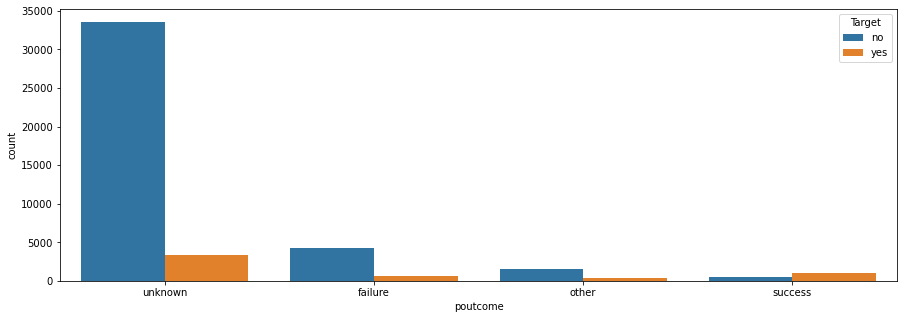

In [26]:

#those who subscribed to previous campaign subscribed to term deposit as well.
#however the number is quite low in data for those subscribed to previous capaign.
print(pd.crosstab(df['poutcome'],df['Target'],normalize='index').mul(100).sort_values(by='yes',ascending=False))
plt.figure(figsize=(15,5))
sns.countplot(x='poutcome',hue='Target',data=df)

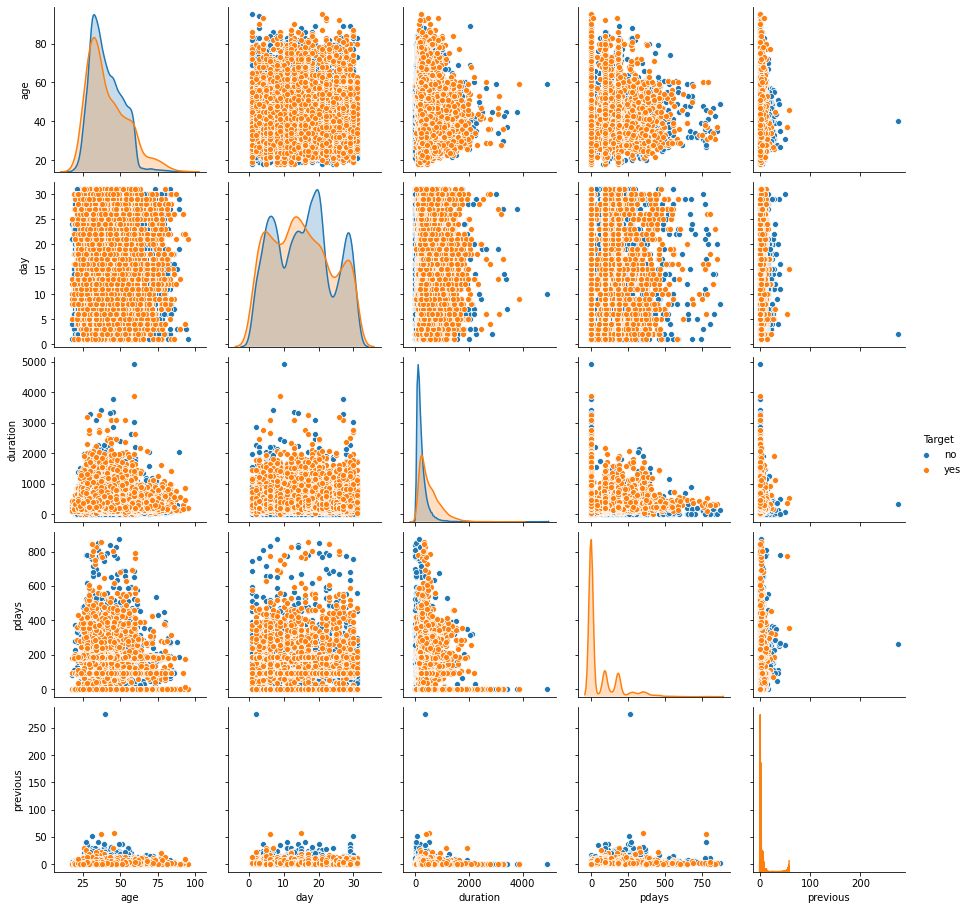

In [27]:
#campaign with lower numver of conatcts have higher chance of getting converted
sns.pairplot(df,hue='Target')

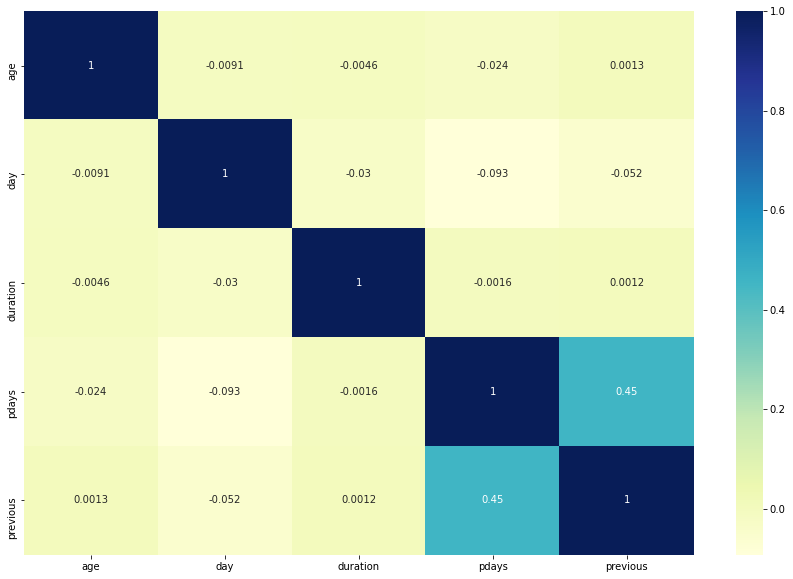

In [28]:
# i. Check correlation among independent features and mention if there is any collinearity. (2 marks)

bank_corr=df.corr()
plt.subplots(figsize =(15, 10)) 
sns.heatmap(bank_corr,cmap="YlGnBu",annot=True)

#none of the variables seems to be highly correlated to each other, lets try dividing them into categories

In [ ]:
df_1=df.copy()
df.drop(['balance','campaign'],axis=1,inplace=True)

In [32]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'pdays', 'previous', 'poutcome',
       'Target', 'bal_group', 'camp_group', 'dura_group'],
      dtype='object')

In [33]:

#Converting day to categorical
df['day']=df['day'].astype('category')
df['Target']=df['Target'].astype('category')

In [34]:
df.dtypes

age              int64
job             object
marital         object
education       object
default         object
housing         object
loan            object
contact         object
day           category
month           object
duration         int64
pdays            int64
previous         int64
poutcome        object
Target        category
bal_group       object
camp_group      object
dura_group      object
dtype: object

In [35]:
# creating a dict file  
label = {'yes': 1,'no': 0} 
df.loan = [label[item] for item in df.loan]
df.default = [label[item] for item in df.default]
df.Target = [label[item] for item in df.Target]

In [36]:
df.head()

age           job  marital  education  default housing  loan  contact day  \
0   58    management  married   tertiary        0     yes     0  unknown   5   
1   44    technician   single  secondary        0     yes     0  unknown   5   
2   33  entrepreneur  married  secondary        0     yes     1  unknown   5   
3   47   blue-collar  married    unknown        0     yes     0  unknown   5   
4   33       unknown   single    unknown        0      no     0  unknown   5   

  month  duration  pdays  previous poutcome  Target         bal_group  \
0   may       261     -1         0  unknown       0      high balance   
1   may       151     -1         0  unknown       0       low balance   
2   may        76     -1         0  unknown       0       low balance   
3   may        92     -1         0  unknown       0  moderate balance   
4   may       198     -1         0  unknown       0       low balance   

    camp_group            dura_group  
0  1st Contact  <2-10 mints Duration  
1  1st Contact  <2-10 mints Duration  
2  1st Contact     <2 mints Duration  
3  1st Contact     <2 mints Duration  
4  1st Contact  <2-10 mints Duration

In [37]:
df_obj=pd.DataFrame(df.select_dtypes(include='object'))
df_obj=pd.get_dummies(df_obj)

In [38]:
df_2 = pd.concat([df,df_obj], axis=1)

In [39]:
print(df_2.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'pdays', 'previous', 'poutcome',
       'Target', 'bal_group', 'camp_group', 'dura_group', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'housing_no', 'housing_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'bal_group_high balance', 'bal_group_l

In [40]:
df_3=df_2.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 
                          'month','bal_group', 'camp_group','duration','poutcome','dura_group'],axis=1)

In [41]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 57 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   age                                     45211 non-null  int64
 1   pdays                                   45211 non-null  int64
 2   previous                                45211 non-null  int64
 3   Target                                  45211 non-null  int64
 4   job_admin.                              45211 non-null  uint8
 5   job_blue-collar                         45211 non-null  uint8
 6   job_entrepreneur                        45211 non-null  uint8
 7   job_housemaid                           45211 non-null  uint8
 8   job_management                          45211 non-null  uint8
 9   job_retired                             45211 non-null  uint8
 10  job_self-employed                       45211 non-null  uint8
 11  job_services   

In [42]:
df_3.shape

(45211, 57)

In [43]:
# 3. Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc.
#(3 marks)


#Test Train Split
X=df_3.drop(['Target'],axis=1)
y=df_3['Target']

In [44]:
#Test Train Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [45]:
X_train.columns

Index(['age', 'pdays', 'previous', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'housing_no', 'housing_yes',
       'contact_cellular', 'contact_telephone', 'contact_unknown', 'month_apr',
       'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'bal_group_high balance', 'bal_group_low balance',
       'bal_group_moderate balance', 'bal_group_negative balance',
       'bal_group_very high balance', 'camp_group_1st Contact',
       'camp_group_2-5 Contacts', 'camp_

In [46]:
y_train.name

'Target'

In [47]:
# 4. Train a decision tree model, note and comment on their performances across different classification
# metrics. (5 marks)

from sklearn.tree import DecisionTreeClassifier

In [48]:
dt_algo = DecisionTreeClassifier(random_state=101)
dt_algo.fit(X_train, y_train)

DecisionTreeClassifier(random_state=101)

In [49]:

y_pred = dt_algo.predict(X_test)
print(dt_algo.score(X_train, y_train))
print(dt_algo.score(X_test , y_test))

0.9958921856732076
0.8680330286051312


confusion matrix: 
 [[11059   926]
 [  864   715]]
accuracy 0.8680330286051312
precision 0.4357099329677026
recall 0.45281823939202026
area-under-curve metric:  0.6877774968340994


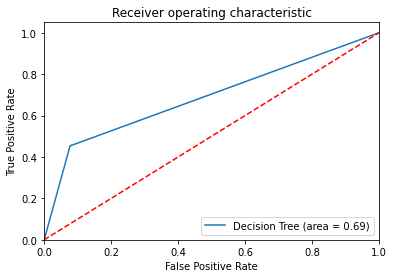

In [50]:
#the model overfits, its accuracy on test data is good. However recall and precision are low. We want model
#to predict better so as we don't waste time in handling customers which are not likely to subscribe 
# metrics
from sklearn import metrics

#confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print("confusion matrix: \n",confusion_matrix)
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))
# precision
print("precision", metrics.precision_score(y_test, y_pred))
# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred))
#Area under curve
print("area-under-curve metric: ", metrics.roc_auc_score(y_test, y_pred))

#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dt_roc_auc = roc_auc_score(y_test, dt_algo.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dt_algo.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [57]:
#Regularization using GridSearchCV
dt_algo1 = DecisionTreeClassifier(random_state = 102)
params = {"max_depth": np.arange(8, 20),"max_features":np.arange(15,55,5),'min_samples_leaf': range(45, 65, 5),
    'min_samples_split': range(2,5),
    'criterion': ["entropy", "gini"]}

In [58]:
from sklearn.model_selection import GridSearchCV
model_cv = GridSearchCV(estimator = dt_algo1, param_grid = params, 
                        scoring= 'accuracy',
                        cv=3,
                        verbose = 1,
                       return_train_score=True)

In [59]:
model_cv.fit(X_train, y_train) 

# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results

Fitting 3 folds for each of 2304 candidates, totalling 6912 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 6912 out of 6912 | elapsed: 19.5min finished


In [60]:

#parameters best value
best_score = model_cv.best_score_
best = model_cv.best_params_
best

{'criterion': 'entropy',
 'max_depth': 14,
 'max_features': 40,
 'min_samples_leaf': 50,
 'min_samples_split': 2}

In [55]:
#using best parameter values
dt_algo_best = DecisionTreeClassifier(max_depth= 14, max_features= 40,random_state=103,min_samples_leaf=50,
                                     min_samples_split=2,criterion='entropy')
dt_algo_best.fit(X_train, y_train)
# predict
y_pred1 = dt_algo_best.predict(X_test)

In [ ]:
#accuracy and precision increase but recall decreases though by less amount and also roc_auc metric 
#decreases by .04.

# metrics
# confusion matrix
print("confusion matrix: \n", metrics.confusion_matrix(y_test, y_pred1))
# accuracy
print("accuracy: ", metrics.accuracy_score(y_test, y_pred1))
# precision
print("precision: ", metrics.precision_score(y_test, y_pred1))
# recall/sensitivity
print("recall: ", metrics.recall_score(y_test, y_pred1))
#Area under curve
print("area-under-curve metric: ", metrics.roc_auc_score(y_test, y_pred1))

#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
dt_roc_auc1 = roc_auc_score(y_test, dt_algo_best.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, dt_algo_best.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_DecisionTree')
plt.show()

In [ ]:
#Feature Importance
dt_imp_feature=pd.DataFrame(dt_algo_best.feature_importances_, columns = ["Imp"], index = X_train.columns)
dt_imp_feature.sort_values(by="Imp",ascending=False)[:15]
#dt_imp_feature.sort_values(by="Imp",ascending=False)

In [ ]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/graphviz-2.38/release/bin/'

#Tree structure
from sklearn import tree
from sklearn.tree import export_graphviz
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
#import pydotplus
#import graphviz

features = X_train.columns
dot_data = StringIO()  
export_graphviz(dt_algo_best, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png()

In [5]:
# 5. Build the ensemble models (random forest, bagging classifier, Adaboosting, and gradient boosting, and
# stacking classifier) and compare the results. (15 marks)

#Bagging

from sklearn.ensemble import BaggingClassifier
bg_bank = BaggingClassifier(random_state=150)
bg_bank.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [ ]:
y_pred_bg = bg_bank.predict(X_test)
print(bg_bank.score(X_train, y_train))
print(bg_bank.score(X_test , y_test))

In [ ]:
#this algo seems overfit, also its recall is low
#metrices
#confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_bg)
print("confusion matrix: \n",confusion_matrix)
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred_bg))
# precision
print("precision", metrics.precision_score(y_test, y_pred_bg))
# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred_bg))
#Area under curve
print("area-under-curve metric: ", metrics.roc_auc_score(y_test, y_pred_bg))

In [ ]:
#Regularization using GridSearchCV
bg_bank1 = BaggingClassifier(random_state=151)
params = {"n_estimators": np.arange(30,50,2),"max_features":[0.78,0.8,0.82,0.84],
          'max_samples': [0.45,0.5,0.55,0.6],'oob_score':['True']}
    
model_cv_bg = GridSearchCV(estimator = bg_bank1, param_grid = params, 
                        scoring= 'accuracy',
                        cv=3,
                        verbose = 1,
                       return_train_score=True)
model_cv_bg.fit(X_train, y_train)

In [ ]:
# results of grid search CV
cv_results_bg = pd.DataFrame(model_cv_bg.cv_results_)
#cv_results_bg

In [ ]:
#parameters best value
best_score_bg = model_cv_bg.best_score_
best_bg = model_cv_bg.best_params_
best_bg

In [ ]:
bg_algo_best = BaggingClassifier(max_features= 0.8, max_samples=0.8,n_estimators=42,oob_score=True,random_state=152)
bg_algo_best.fit(X_train, y_train)
# predict
y_pred1_bg = bg_algo_best.predict(X_test)

In [ ]:
#Accuracy improves and so does precision, but recall drops .
# metrics
# confusion matrix
print("confusion matrix: \n", metrics.confusion_matrix(y_test, y_pred1_bg))
# accuracy
print("accuracy: ", metrics.accuracy_score(y_test, y_pred1_bg))
# precision
print("precision: ", metrics.precision_score(y_test, y_pred1_bg))
# recall/sensitivity
print("recall: ", metrics.recall_score(y_test, y_pred1_bg))
#Area under curve
print("area-under-curve metric: ", metrics.roc_auc_score(y_test, y_pred1_bg))

In [ ]:
#ROC
bg_roc_auc = roc_auc_score(y_test, bg_algo_best.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, bg_algo_best.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Bagging (area = %0.2f)' % bg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_Bagging')
plt.show()


#Feature Importance
feature_importances = np.mean([ tree.feature_importances_ for tree in bg_algo_best.estimators_], axis=0)
bg_imp_feature=pd.DataFrame(feature_importances, columns = ["Imp"])
bg_imp_feature.sort_values(by="Imp",ascending=False)

In [ ]:
#RandomForest Algo
from sklearn.ensemble import RandomForestClassifier
rf_bank = RandomForestClassifier(random_state=200)
rf_bank.fit(X_train, y_train)

y_pred_rf = rf_bank.predict(X_test)
print(rf_bank.score(X_train, y_train))
print(rf_bank.score(X_test , y_test))

In [ ]:
#confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
print("confusion matrix: \n",confusion_matrix)
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred_rf))
# precision
print("precision", metrics.precision_score(y_test, y_pred_rf))
# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred_rf))
#Area under curve
print("area-under-curve metric: ", metrics.roc_auc_score(y_test, y_pred_rf))

In [ ]:
#Regularization using GridSearchCV
rf_bank1 = RandomForestClassifier(random_state = 201,oob_score="True",bootstrap=True)

params = {"n_estimators": np.arange(12,18,2),'criterion': ["entropy"],"max_depth": np.arange(9, 15,2),
          "max_features":np.arange(15,30,5),'min_samples_leaf': range(26, 32, 2),
    'min_samples_split': range(26, 32, 2)}

model_cv_rf = GridSearchCV(estimator = rf_bank1, param_grid = params, 
                        scoring= 'accuracy',
                        cv=3,
                        verbose = 1,
                       return_train_score=True) 
                      
model_cv_rf.fit(X_train, y_train) 

# results of grid search CV
cv_results_rf = pd.DataFrame(model_cv_rf.cv_results_)
#cv_results_rf

In [ ]:
#parameters best value
best_score_rf = model_cv_rf.best_score_
best_rf = model_cv_rf.best_params_
best_rf

In [ ]:
rf_bank_best = RandomForestClassifier(max_depth= 13, max_features= 25,random_state=202,
                                      n_estimators=16,criterion='entropy',
                                     min_samples_leaf=30,min_samples_split=30)
rf_bank_best.fit(X_train, y_train)
# predict
y_pred1_rf = rf_bank_best.predict(X_test)


# metrics
# confusion matrix
print("confusion matrix: \n", metrics.confusion_matrix(y_test, y_pred1_rf))
# accuracy
print("accuracy: ", metrics.accuracy_score(y_test, y_pred1_rf))
# precision
print("precision: ", metrics.precision_score(y_test, y_pred1_rf))
# recall/sensitivity
print("recall: ", metrics.recall_score(y_test, y_pred1_rf))
#Area under curve
print("area-under-curve metric: ", metrics.roc_auc_score(y_test, y_pred1_rf))

In [ ]:
#ROC
rf_roc_auc = roc_auc_score(y_test, rf_bank_best.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_bank_best.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_RandomForest')
plt.show()


#Feature Importance
rf_imp_feature=pd.DataFrame(rf_bank_best.feature_importances_, columns = ["Imp"], index = X_train.columns)
rf_imp_feature.sort_values(by="Imp",ascending=False)[:15]

In [ ]:
#AdaBoost Algo
from sklearn.ensemble import AdaBoostClassifier
# base estimator
tree = DecisionTreeClassifier(max_depth=2)

# adaboost with the tree as base estimator
ada_bank = AdaBoostClassifier(
    base_estimator=tree,
    algorithm="SAMME",random_state=250)
ada_bank.fit(X_train, y_train)

y_pred_ada = ada_bank.predict(X_test)
print(ada_bank.score(X_train, y_train))
print(ada_bank.score(X_test , y_test))

In [ ]:
#confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_ada)
print("confusion matrix: \n",confusion_matrix)
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred_ada))
# precision
print("precision", metrics.precision_score(y_test, y_pred_ada))
# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred_ada))
#Area under curve
print("area-under-curve metric: ", metrics.roc_auc_score(y_test, y_pred_ada))

In [ ]:
#Regularization using GridSearchCV

ada_bank1 = AdaBoostClassifier(base_estimator=tree,algorithm="SAMME",random_state=251)

# parameter grid
params = {"base_estimator__max_depth" : np.arange(2, 8,2),"n_estimators": [150,200,250],
         "learning_rate":[0.2,0.3,0.4]}

model_cv_ada = GridSearchCV(estimator = ada_bank1, param_grid = params, 
                        scoring= 'accuracy',
                        cv=3,
                        verbose = 1,
                       return_train_score=True) 
                       
                       
model_cv_ada.fit(X_train, y_train) 

# results of grid search CV
cv_results_ada = pd.DataFrame(model_cv_ada.cv_results_)
#cv_results_ada

In [ ]:
#parameters best value
best_score_ada = model_cv_ada.best_score_
best_ada = model_cv_ada.best_params_
best_ada

In [ ]:
# base estimator
tree = DecisionTreeClassifier(max_depth=4)
ada_bank_best = AdaBoostClassifier(base_estimator=tree , n_estimators=200,
                                   random_state=252,learning_rate=0.3)
ada_bank_best.fit(X_train, y_train)
# predict
y_pred1_ada = ada_bank_best.predict(X_test)

# metrics
# confusion matrix
print("confusion matrix: \n", metrics.confusion_matrix(y_test, y_pred1_ada))
# accuracy
print("accuracy: ", metrics.accuracy_score(y_test, y_pred1_ada))
# precision
print("precision: ", metrics.precision_score(y_test, y_pred1_ada))
# recall/sensitivity
print("recall: ", metrics.recall_score(y_test, y_pred1_ada))
#Area under curve
print("area-under-curve metric: ", metrics.roc_auc_score(y_test, y_pred1_ada))

In [ ]:
#ROC
ada_roc_auc = roc_auc_score(y_test, ada_bank_best.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, ada_bank_best.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Ada Boost (area = %0.2f)' % ada_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_AdaBoost')
plt.show()

#Feature Importance
ada_imp_feature=pd.DataFrame(ada_bank_best.feature_importances_, columns = ["Imp"], index = X_train.columns)
ada_imp_feature.sort_values(by="Imp",ascending=False)[:15]

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_bank = GradientBoostingClassifier(random_state=300)
gbc_bank.fit(X_train, y_train)

y_pred_gbc = gbc_bank.predict(X_test)
print(gbc_bank.score(X_train, y_train))
print(gbc_bank.score(X_test , y_test))

In [ ]:
#confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_gbc)
print("confusion matrix: \n",confusion_matrix)
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred_gbc))
# precision
print("precision", metrics.precision_score(y_test, y_pred_gbc))
# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred_gbc))
#Area under curve
print("area-under-curve metric: ", metrics.roc_auc_score(y_test, y_pred_gbc))

In [ ]:
###As this run is taking very long, adjusting 1 parameter in grid search. However use trial and error by passing single 
###value in fit
#Regularization using GridSearchCV
gbc_bank = GradientBoostingClassifier(random_state=301)
params = {"n_estimators": [200,210,220]}#,"learning_rate":[0.1,0.2],"max_depth": np.arange(10, 16)}
#          "max_features":np.arange(36,50,2),'min_samples_leaf': range(45, 60, 5)}

model_cv_gbc = GridSearchCV(estimator = gbc_bank, param_grid = params, 
                        scoring= 'accuracy',
                        cv=3,
                        verbose = 1,
                       return_train_score=True)

In [ ]:
model_cv_gbc.fit(X_train, y_train) 

# results of grid search CV
cv_results_gbc = pd.DataFrame(model_cv_gbc.cv_results_)
#cv_results_gbc

In [ ]:

#parameters best value
best_score_gbc = model_cv_gbc.best_score_
best_gbc = model_cv_gbc.best_params_
best_gbc

In [ ]:
#After fitting best parameters
gbc_bank_best = GradientBoostingClassifier(learning_rate= 0.1, n_estimators= 220,max_depth= 14, 
                                           max_features= 42,random_state=103,min_samples_leaf=50,min_samples_split=50)

gbc_bank_best.fit(X_train, y_train)
# predict
y_pred1_gbc = gbc_bank_best.predict(X_test)


In [ ]:
# metrics
# confusion matrix
print("confusion matrix: \n", metrics.confusion_matrix(y_test, y_pred1_gbc))
# accuracy
print("accuracy: ", metrics.accuracy_score(y_test, y_pred1_gbc))
# precision
print("precision: ", metrics.precision_score(y_test, y_pred1_gbc))
# recall/sensitivity
print("recall: ", metrics.recall_score(y_test, y_pred1_gbc))
#Area under curve
print("area-under-curve metric: ", metrics.roc_auc_score(y_test, y_pred1_gbc))


#ROC
gbc_roc_auc = roc_auc_score(y_test, gbc_bank_best.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gbc_bank_best.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='gbc Boost (area = %0.2f)' % gbc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_GradientBoost')
plt.show()

In [ ]:
#Feature Importance
gbc_imp_feature=pd.DataFrame(gbc_bank_best.feature_importances_, columns = ["Imp"], index = X_train.columns)
gbc_imp_feature.sort_values(by="Imp",ascending=False)[:15]

In [ ]:
#xgboost
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

train_data = np.array(X_train)
test_data = np.array(X_test)

xgb_bank = XGBClassifier(random_state=400)
xgb_bank.fit(train_data, y_train)

y_pred_xgb = xgb_bank.predict(test_data)
print(xgb_bank.score(train_data, y_train))
print(xgb_bank.score(test_data , y_test))

In [ ]:
#confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_xgb)
print("confusion matrix: \n",confusion_matrix)
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred_xgb))
# precision
print("precision", metrics.precision_score(y_test, y_pred_xgb))
# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred_xgb))
#Area under curve
print("area-under-curve metric: ", metrics.roc_auc_score(y_test, y_pred_xgb))

In [ ]:
#Regularization using GridSearchCV - 1st Iteration

params1 = {
    "colsample_bytree": [i/100.0 for i in range(78,82,2)],
    "learning_rate": [0.2,0.3], 
    "n_estimators": [142,144,146],
    "subsample": [i/100.0 for i in range(80,84,2)]
}

model_cv_xgb1 = GridSearchCV(estimator = xgb_bank, param_grid = params1, 
                        scoring= 'accuracy',
                        cv=3,
                        verbose = 1,
                       return_train_score=True)

In [ ]:

model_cv_xgb1.fit(train_data,y_train) 

# results of grid search CV
cv_results_xgb1 = pd.DataFrame(model_cv_xgb1.cv_results_)
cv_results_xgb1

#parameters best value
best_score_xgb1 = model_cv_xgb1.best_score_
best_xgb1 = model_cv_xgb1.best_params_
best_xgb1

In [ ]:
#Choosing best parameter from 1st Iteration
xgb_bank_best1 = XGBClassifier(colsample_bytree=0.8,learning_rate=0.2,n_estimators=144,subsample=0.82)
xgb_bank_best1.fit(train_data, y_train)
# predict
y_pred_xgb1 = xgb_bank_best1.predict(test_data)

#confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_xgb1)
print("confusion matrix: \n",confusion_matrix)
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred_xgb1))
# precision
print("precision", metrics.precision_score(y_test, y_pred_xgb1))
# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred_xgb1))
#Area under curve
print("area-under-curve metric: ", metrics.roc_auc_score(y_test, y_pred_xgb1))

In [ ]:
#Regularization using GridSearchCV - 2nd Iteration

params2 = {
    'min_child_weight':[4,5,6,7],"max_depth": [2,4,6],
}

model_cv_xgb2 = GridSearchCV(estimator = xgb_bank_best1, param_grid = params2, 
                        scoring= 'accuracy',
                        cv=3,
                        verbose = 1,
                       return_train_score=True)

In [ ]:
#Choosing best parameter obtained from 2nd Iteration an apply to model of 1st iteration
model_cv_xgb2.fit(train_data,y_train) 

# results of grid search CV
cv_results_xgb2 = pd.DataFrame(model_cv_xgb2.cv_results_)
cv_results_xgb2

#parameters best value
best_score_xgb2 = model_cv_xgb2.best_score_
best_xgb2 = model_cv_xgb2.best_params_
best_xgb2

In [ ]:

xgb_bank_best2 = XGBClassifier(colsample_bytree=0.8,learning_rate=0.2,n_estimators=144,subsample=0.82,
                              min_child_weight=6,max_depth=4)
xgb_bank_best2.fit(train_data, y_train)
# predict
y_pred_xgb2 = xgb_bank_best1.predict(test_data)

#confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_xgb2)
print("confusion matrix: \n",confusion_matrix)
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred_xgb2))
# precision
print("precision", metrics.precision_score(y_test, y_pred_xgb2))
# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred_xgb2))
#Area under curve
print("area-under-curve metric: ", metrics.roc_auc_score(y_test, y_pred_xgb2))

In [ ]:
#Regularization using GridSearchCV - 3rd Iteration

params3 = {
    'gamma':[0.3,0.35,0.4,0.45]
}

model_cv_xgb3 = GridSearchCV(estimator = xgb_bank_best2, param_grid = params3, 
                        scoring= 'accuracy',
                        cv=3,
                        verbose = 1,
                       return_train_score=True) 
                       
                       
model_cv_xgb3.fit(train_data,y_train) 

# results of grid search CV
cv_results_xgb3 = pd.DataFrame(model_cv_xgb3.cv_results_)

In [ ]:

#parameters best value
best_score_xgb3 = model_cv_xgb3.best_score_
best_xgb3 = model_cv_xgb3.best_params_
best_xgb3

In [ ]:
xgb_bank_best3 = XGBClassifier(colsample_bytree=0.8,learning_rate=0.2,n_estimators=144,subsample=0.82,
                              min_child_weight=6,max_depth=4,gamma=0.4)
xgb_bank_best3.fit(train_data, y_train)
# predict
y_pred_xgb3 = xgb_bank_best3.predict(test_data)


#confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_xgb3)
print("confusion matrix: \n",confusion_matrix)
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred_xgb3))
# precision
print("precision", metrics.precision_score(y_test, y_pred_xgb3))
# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred_xgb3))
#Area under curve
print("area-under-curve metric: ", metrics.roc_auc_score(y_test, y_pred_xgb3))

In [ ]:
#Regularization using GridSearchCV - 4th Iteration

params4 = {
    'reg_lambda':[1e-2,0.05,0.1]
}

model_cv_xgb4 = GridSearchCV(estimator = xgb_bank_best3, param_grid = params4, 
                        scoring= 'accuracy',
                        cv=3,
                        verbose = 1,
                       return_train_score=True) 
                       
                       
model_cv_xgb4.fit(train_data,y_train) 

# results of grid search CV
cv_results_xgb4 = pd.DataFrame(model_cv_xgb4.cv_results_)

In [ ]:

#parameters best value
best_score_xgb4 = model_cv_xgb4.best_score_
best_xgb4 = model_cv_xgb4.best_params_
best_xgb4

In [ ]:

xgb_bank_best4 = XGBClassifier(colsample_bytree=0.8,learning_rate=0.2,n_estimators=144,subsample=0.82,
                              min_child_weight=6,max_depth=4,gamma=0.4,reg_lambda=0.05)
xgb_bank_best4.fit(train_data, y_train)
# predict
y_pred_xgb4 = xgb_bank_best4.predict(test_data)


#confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_xgb4)
print("confusion matrix: \n",confusion_matrix)
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred_xgb4))
# precision
print("precision", metrics.precision_score(y_test, y_pred_xgb4))
# recall/sensitivity
print("recall", metrics.recall_score(y_test, y_pred_xgb4))
#Area under curve
print("area-under-curve metric: ", metrics.roc_auc_score(y_test, y_pred_xgb4))

In [ ]:

#ROC
Xgbc_roc_auc = roc_auc_score(y_test, y_pred_xgb4)
fpr, tpr, thresholds = roc_curve(y_test, xgb_bank_best4.predict_proba(test_data)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='gbc Boost (area = %0.2f)' % Xgbc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC_XBBoost')
plt.show()

In [ ]:
#Feature Importance
gbc_imp_feature=pd.DataFrame(xgb_bank_best4.feature_importances_, columns = ["Imp"], index = X_train.columns)
gbc_imp_feature.sort_values(by="Imp",ascending=False)[:16]

In [ ]:
# 6. Compare performances of all the models and comment on your findings. (5 marks)

 Gradient Boost is appearing to be best among all the models as it has an accuracyof 89.6% and precision of 56.4% is good considering data given. 